### Что я делаю:
1. Загружаю файл hr.csv.

2. Рассчитываю основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитываю и визуализирую корреляционную матрицу для переменных.

4. Визуализирую несколько взаимосвязей между переменными.

5. С использованием t-test статистики проверяю взаимосвязи между несколькими переменными.

6. Рассчитываю, сколько работников работает в каждом департаменте.

7. Показываю распределение сотрудников по зарплатам.

8. Показываю распределение сотрудников по зарплатам совместно с департаментами.

9. Сколько сотрудников покинули компанию.

10. Проверяю несколько гипотез для данных, чтобы понять, почему сотрудники покидают компанию.

11. Делаю выводы. 

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from PIL import Image

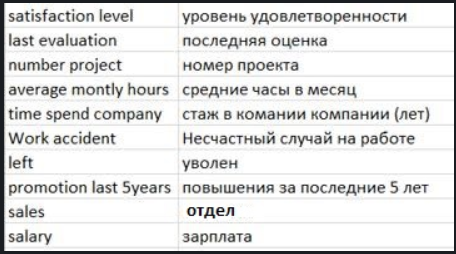

In [2]:
img = Image.open("index.png")
img

In [3]:
# 1. Загружаю файл HR.csv
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#2. Рассчитываю основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode(numeric_only=True)
# df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


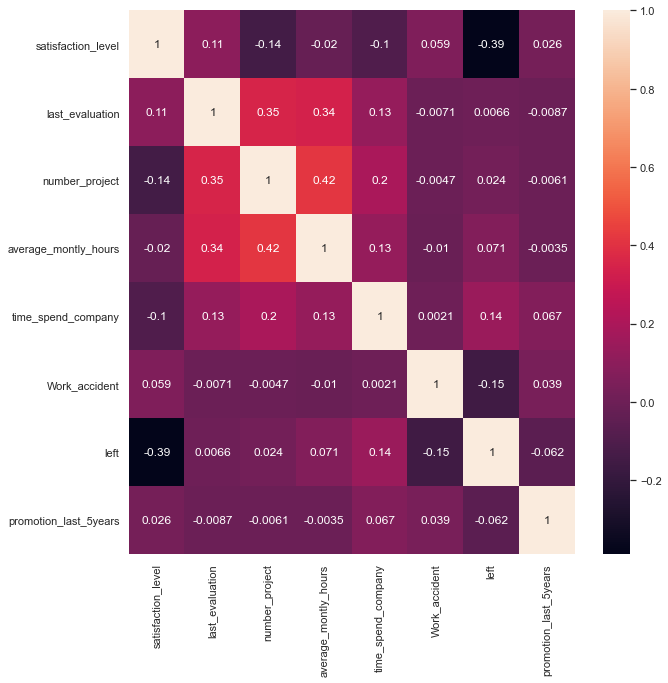

In [6]:
#3. Рассчитываю и визуализирую корреляционную матрицу для переменных.
corr_matrix = df.corr()
sns.set(rc=({'figure.figsize':(10, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

По корреляционной матрице можно понять зависимость данных друг от друга. На данном примере матрица 4х4, начиная от last_evaluation и до time_spend_company явно "теплее" остальных пересечений. Однако, также можно заметить слабую корреляцию time_spend_company - left, last_evaluation - satisfaction_level.

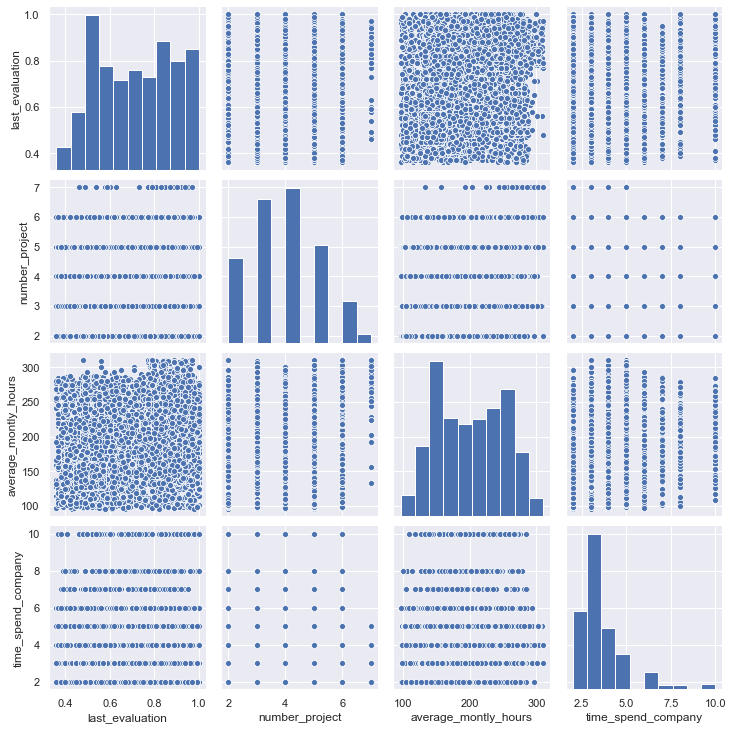

In [7]:
#4 Визуализирую несколько взаимосвязей между переменными.
sns.pairplot(df, vars=['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], kind="scatter")

Изучим детальнее ту самую матрицу 4х4 'time_spend_company - average_montly_hours - number_project - last_evalueation'. 

В принципе, здесь прослеживается некая ковариативность на пересечении 'last_evaluation - average_montly_hours'.

Остальные пересечения выглядят равномерными: чем больше стаж, тем больше проектов. А вот в случае с оценками (last_evaluation), то видно, что они не зависят от стажа и распределены равномерно. 

In [8]:
# 5. С использованием t-test статистики проверяю взаимосвязи между несколькими переменными.
#Гипотеза: среднее значение уровня удовлетворённости (satisfaction_level) сотрудников с разными зарплатами
#не отличается от среднего значения генеральной совокупности
df.satisfaction_level.mean()

0.6128335222348156

In [9]:
#заменяю параметрические low, medium и high на числовые 0, 1, 2
df.salary.replace(to_replace=dict(low=0, medium=1, high=2), inplace=True)

In [10]:
# Применяю одновыборочный t-критерий (потому что переменных 3, а значит, двухвыборочный не подходит)

low_salary = df[df['salary']==0]['satisfaction_level']
middle_salary = df[df['salary']==1]['satisfaction_level']
high_salary = df[df['salary']==2]['satisfaction_level']
print(stats.ttest_1samp(low_salary, df.satisfaction_level.mean()))
print(stats.ttest_1samp(middle_salary, df.satisfaction_level.mean()))
print(stats.ttest_1samp(high_salary, df.satisfaction_level.mean()))
# print(df.salary.value_counts())

Ttest_1sampResult(statistic=-4.058538121601885, pvalue=4.989514976710961e-05)
Ttest_1sampResult(statistic=2.9429521364932394, pvalue=0.0032625787024453236)
Ttest_1sampResult(statistic=3.820599750186325, pvalue=0.0001397436869585777)


In [11]:
# Или использую тест ANOVA
restecg_0 = df[df['salary']==0]['satisfaction_level']

restecg_1 = df[df['salary']==1]['satisfaction_level']

restecg_2 = df[df['salary']==2]['satisfaction_level']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

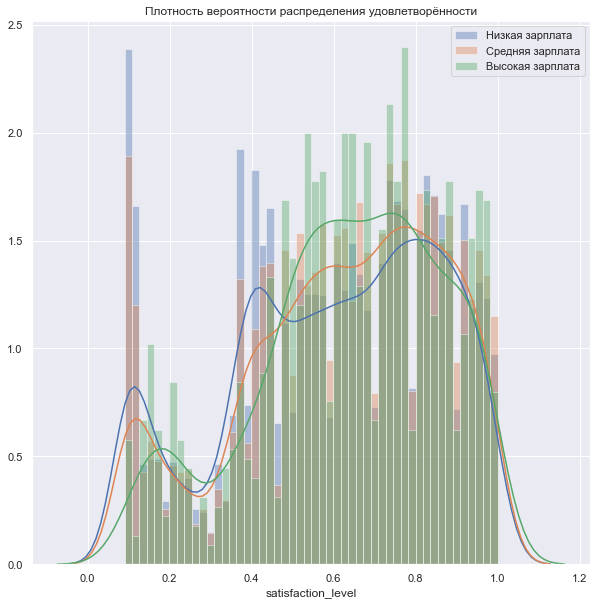

In [12]:
sns.distplot(low_salary, 50)
sns.distplot(middle_salary, 50)
sns.distplot(high_salary, 50)
plt.title('Плотность вероятности распределения удовлетворённости')
plt.legend(['Низкая зарплата', 'Средняя зарплата', 'Высокая зарплата'])
plt.show()

Я решил изучить, насколько уровень заработной платы 'salary' влияет на удовлетворенность работой 'satisfaction_leve'. 

Как посчитано выше, средний показатель удовлетворенности = 0,613. Поскольку параметрические критерии необходимо заменить на числовые (ранговые), мы это делаем, присвоив низкой зарплате 0, средней - 1, высокой, соответственно, 2. Итого получилось 3 критерия. 

Поскольку критерия 3, я сперва применяю одновыборочный t-критерий для каждого из ранга заработной платы. Получившийся уровень p-value меньше 0,05, а значит, мы отвергаем нулевую гипотезу о том, что эти две выборки полностью независимы. Некая слабая зависимость имеется. 

Для сравнения выборок с количеством критерив больше 3, есть тест ANOVA. Его и применяем. p-value также оказался меньше критического значения 0,05, а значит, здесь мы также отвергаем нулевую гипотезу о независимости выборок. 


In [13]:
#6. Рассчитываю, сколько работников работает в каждом департаменте.
df.sales.value_counts() 

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

В продажах работает больше всего сотрудников, а в руководстве, соответственно, меньше всего. 

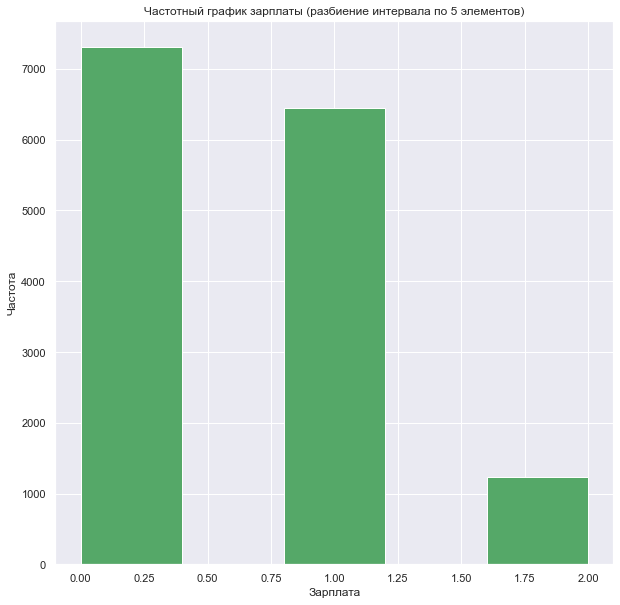

In [14]:
#7. Отображаю распределение сотрудников по зарплатам
n, bins, patches = plt.hist(df['salary'], 5, facecolor='g')

plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Частотный график зарплаты (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

В глаза сразу бросается слишком большой разрыв между средней зарплатой и высокой и настолько же маленький разрыв между маленькой и средней зарплатой. В компании, определённо, огромное количество менеджеров среднего звена со средним же уровнем заработка!

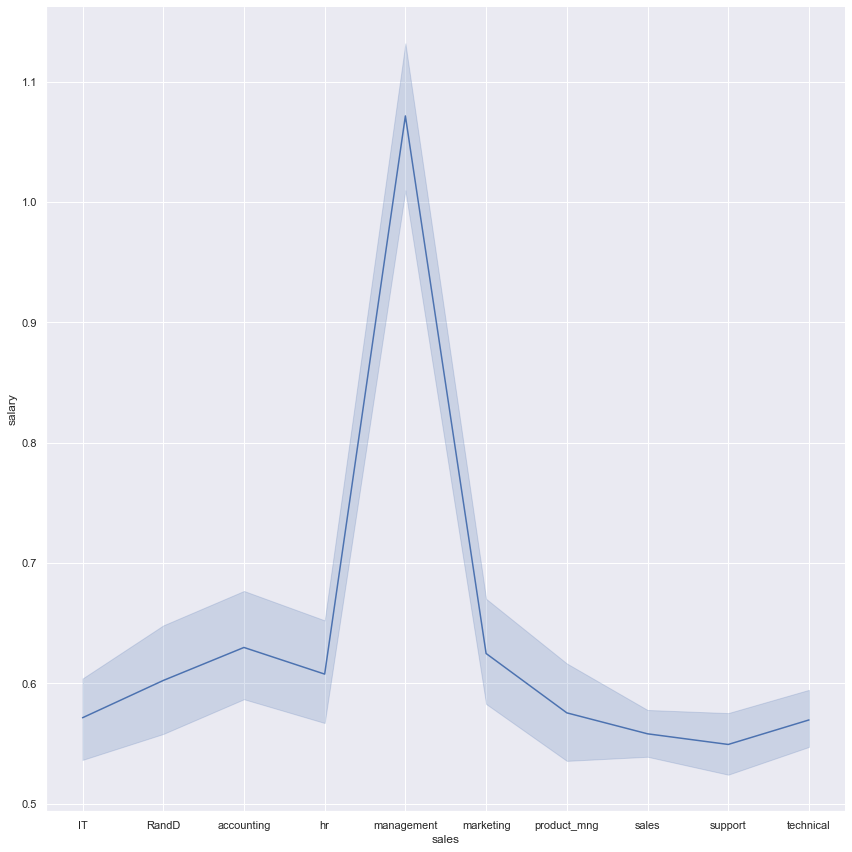

In [15]:
# 8. Показываю распределение сотрудников по зарплатам совместно с департаментами.
sns.relplot(x='sales', 
            y='salary', 
            kind='line', 
            data=df,
            height = 12)

Подтверждается выдвинутая ранее гипотеза: фонд оплаты менеджмента сильно больше среднего уровня по сотрудникам. Однако, заработная плата маркетинга, на удивление, выше IT. 

In [16]:
# 9. Сколько сотрудников покинули компанию.
df.left.value_counts() 

0    11428
1     3571
Name: left, dtype: int64

In [17]:
# 10. Проверяю несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [18]:
#Н0 = уровень зарплаты не влияет на увольнение
#Н1 = уровень зарплаты влияет на увольнение

left_0 = df[df['salary']==0]['left']

left_1 = df[df['salary']==1]['left']

left_2 = df[df['salary'] == 2]['left']


stats.f_oneway(left_0, left_1, left_2)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

In [19]:
#Поскольку pvalue меньше 0.05, мы отвергаем нулевую гипотезу. 

df[df['salary']==0]['left'].mean()

0.2968835429196282

In [20]:
df[df['salary']==1]['left'].mean()

0.20431275209432206

In [21]:
df[df['salary']==2]['left'].mean()

0.06628940986257073

Как видно, работники с высокой зарплатой увольняются реже.
Если зарплата сотрудника низкая или средняя, он с большей вероятностью покинет компанию.

In [22]:
#Н0 = удовлетворённость не влияет на увольнение
#Н1 = удовлетворённость влияет на увольнение

work = df[df['left']==0]['satisfaction_level']

fired = df[df['left']==1]['satisfaction_level']

stats.ttest_ind(work, fired)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

Так как pvalue 0, а показатель t равен 51.6, мы отвергаем нулевую гипотезу об отсутствии различий в этих двух группах. 

In [23]:
df[df['left']==1]['satisfaction_level'].mean()

0.4400980117614114

In [24]:
df[df['left']==0]['satisfaction_level'].mean()

0.666809590479524

Теперь возьмём столбец promotion_last_5years и предположим, что наличие/отсутствие повышений влияют на показатель увольнений.

In [25]:
#отфильтрую исходный датафрейм по работающим (0) и по уволившимся сотрудникам (1)
df1 = df[df['left'] == 0]
df2 = df[df['left'] == 1]

In [26]:
print('Доля сотрудников, получивших повышение среди работающих сотрудников',\
      len(df1[df1['promotion_last_5years'] == 1]) * 100 / df1['promotion_last_5years'].count())

Доля сотрудников, получивших повышение среди работающих сотрудников 2.625131256562828


In [27]:
print('Доля сотрудников, получивших повышение среди уволившихся сотрудников',\
      len(df2[df2['promotion_last_5years'] == 1]) * 100 / df2['promotion_last_5years'].count())

Доля сотрудников, получивших повышение среди уволившихся сотрудников 0.5320638476617194


Из получившегося результата можно сделать вывод, что повышения оказывают существенное влияние на принятие решений об увольнении. 